# Instruments and Catalogue matching

Requested ingredients:
* fits file of a known instrument (sdss, hst, ptf, stella) having a wcs solution
* an internet connection (for the 'download_catalogue' method)

## Instrument vs. Image

An instrument has several additional functionalities in comparison to an Image.
* fundatental parameters:
   * bandname (enabling bandpass and lbda)
   * mab0 (zeropoint of the instrument)
   * _dataunits_to_election (that enables aperture photometry using sep).


**Remark**: 'Instrument' inherite from 'Image'. 

**Code Construction**: The mother class is 'Image', then a basic 'BaseInstrument' is defined that structures the future individual instruments: 'SDSS', 'HST' etc that all are classes inheriting 'BaseInstrument' (i.e. grand child of Image). 

**Info** the list of known instrument is recorded in astrobject.astrobject.instruments.instrument.KNOWN_INSTRUMENTS

In [1]:
# plot within the notebook
%matplotlib inline
# no annoying warnings
import warnings
warnings.filterwarnings('ignore')
# Astrobject module
from astrobject import instrument 

## Load the Instrument. Easy

Load the instrument, here the "sdss" object

In [2]:
sdss = instrument("data/sdss_PTF10qjq_g.fits")

The visualisation is the same as for Image (same method inherated)

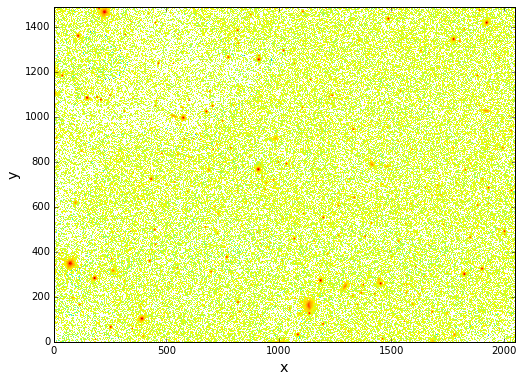

In [3]:
pl = sdss.show()

## Load a catalogue for the image's field of view

If you have access to internet, the download_catalogue() methods enables you to directly query for the catalogue associated to your image. 
When you do so, you can specify the catalogue properties:
Catalogue arguments:
* source: The origin of the catalogue (SDSS/WISE/2MASS)
* column_filters: a dictionnary selecting the catalogue sources. For instance, if you want the sdss sources that have a magnitude range in the g-band between 13 and 22: column_filters={"gmag":"13..20"} 

**Remark** This functionnality is also accessible from an 'image' object.

In [8]:
sdss.download_catalogue(source="sdss",column_filters={"bmag":"13..20"},force_it=True) 

You can now visualize the catalogue using the show() method

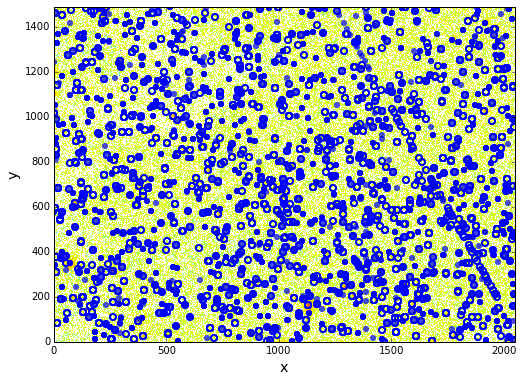

In [10]:
pl = sdss.show(show_catalogue=True)
# Legend: Full marker = stars / Open markers = non-stars (galaxies)

In [8]:
# ============================== #
# = Easy Sextractor Extraction = #
# ============================== #
sdss.sep_extract()
# - This fill the sepobjects entry, you can directly have it with the option returnobjects=True
# or you can retreive it.
o = sdss.sepobjects

{'ax': <matplotlib.axes._axes.Axes at 0x1109bbb10>,
 'figure': <matplotlib.figure.Figure at 0x1106582d0>,
 'imshow': <matplotlib.image.AxesImage at 0x11297c8d0>,
 'prop': {'interpolation': 'nearest', 'origin': 'lower'},
 'target_plot': None,
 'wcs_coords': False}

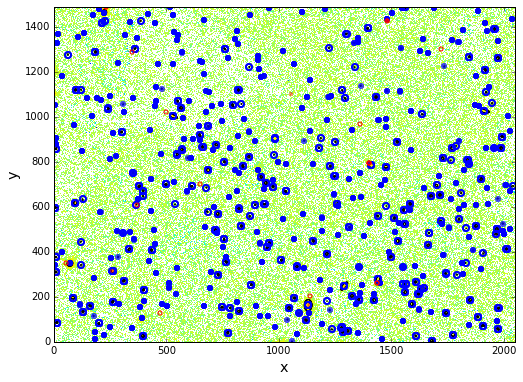

In [9]:
# IMPORTANT
# if you have both a catalogue and a sepobjects *AN AUTOMATIC MATCHING WILL BE PERFORMED*
# Note, there is no order, you can first set a catalogue and then do sep_extract or the other way around

# -- This lets show again to see
sdss.show()

# - in red (with the same open/fill code) the points in the catalogue with no sep/sextractor matching

(550, 700)

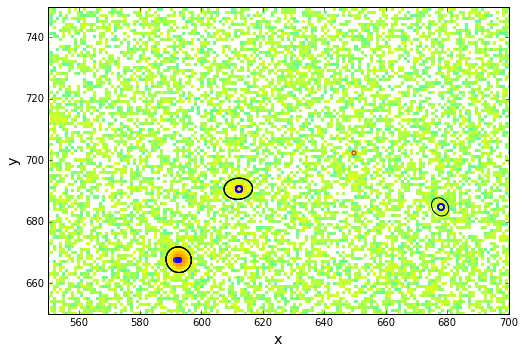

In [11]:
# lets zoom in
sdss.show(show=False)
sdss._plot["ax"].set_ylim(650,750)
sdss._plot["ax"].set_xlim(550,700)

In [12]:
# ------------------- #
# - THE SEXOBJECT    - #
# ------------------- #
print o.catmatch
# idx = The index in the sextractor data
# idx_catalogue = The index in the catalogue 
# remark you have access to the catalogue in sdss.catalogue or o.catalogue (this is the same)

{'angsep': <Angle [  2.84904757e-05,  4.50326514e-05,  3.45607495e-05,...,
          3.25413134e-05,  9.06575462e-06,  1.45658933e-05] deg>, 'idx': array([44, 44, 44, ..., 83, 83, 83]), 'idx_catalogue': array([   0,    1,    2, ..., 1617, 1618, 1619])}


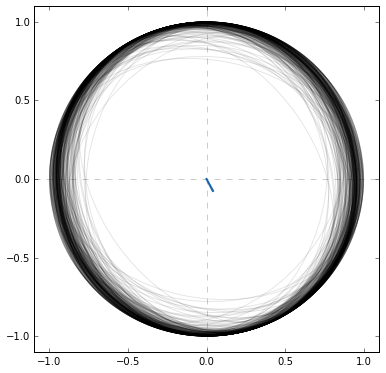

In [13]:
# -- Some statistics
o.show_ellipses(stars_only=True)
# This gives you the typical PSF shape. The blue line (triagle in fact) is the typical angle
# the size is the ellipticity

In [14]:
# -- usefull method "get". give a keywork and this will retreive the associated data
o.get("help") # set help to have a list of the avialable keywords

 Known keys are: cxx ,cxy ,ycpeak ,xy ,xmin ,y2 ,xpeak ,ymin ,ymax ,tnpix ,cpeak ,theta ,xcpeak ,cyy ,flag ,thresh ,peak ,x2 ,ypeak ,cflux ,a ,b ,npix ,flux ,xmax ,y ,x ,angsep ,elongation ,ellipticity


In [15]:
o.get("x")[:10] # only the first 10 here

array([  177.84588567,   549.54374427,  1058.05429586,  1277.61493231,
        2044.7318798 ,  1678.19459088,  1918.64387743,   255.02852975,
         182.90271419,  1456.38492678])

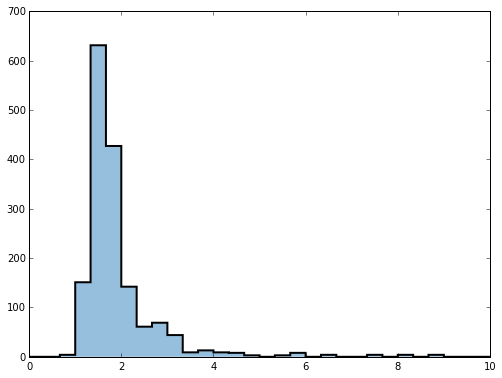

In [16]:
# show the distribution of any keyword
o.show_hist("a",bins=30, range=[0,10])

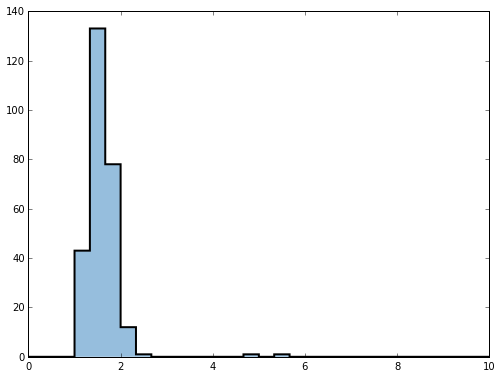

In [17]:
# - or just for the stars
o.show_hist("a",bins=30, range=[0,10], stars_only=True)